In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import importlib
import numpy as np
import pandas as pd

np.set_printoptions(suppress=True)

In [7]:
agent.update_inputs.shape

(1274, 30, 3)

In [8]:
agent.advantages

array([[-0.58263806,  0.        ,  0.        ,  0.        ],
       [-0.58263683,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.58263559,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ,  3.06603228],
       [ 0.        ,  0.        ,  3.06640277,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  3.06567836]])

In [37]:
agent.states['shape'] = agent.states['state'].apply(lambda x: x.shape if type(x) != int else 0)
agent.states.head()

,state,shape
date,,
2000-01-03,0,0
2000-01-04,0,0
2000-01-05,0,0
2000-01-06,0,0
2000-01-07,0,0


In [40]:
states         = agent.states.values[30:-1, 0]
episode_length = len(states)
update_inputs  = np.zeros((episode_length, 30, 3))

for i in range(episode_length):
    update_inputs[i] = states[i]
#     update_inputs = np.append(update_inputs, states[i])
    
update_inputs.shape

(1274, 30, 3)

In [11]:
env.number_of_steps

1305

In [19]:
from stocks import Stocks
from agents.reinforce import REINFORCE
from environment import Env
from simulation import Simulation
from utils import *
from visualizations import *

stocks = Stocks(['AAPL', 'BA', 'GE'], start='2000-1-1', end='2004-12-31')
agent  = REINFORCE()
env    = Env(stocks=stocks, fee=0.002)

sim = Simulation(stocks, agent, env)
sim.run(1)

Training
(1274, 30, 3) (1274, 4)
Epoch 1/1
1274/1274 [==============================] - 2s 1ms/step - loss: nan     
Mean returns -0.008608957970668655
Cumulative returns -0.9999910651930848
Sharpe ratio -13.699163376448416
Maximum drawdown -0.9999910651930848
Exploration rate 1.0



In [17]:
agent.returns.values[30:, 0]

array([ 0.        ,  0.01985515, -0.008     , ..., -0.008     ,
       -0.01131767,  0.        ])

In [18]:
agent.returns.values[30:, 0]

array([ 0.        ,  0.01985515, -0.008     , ..., -0.008     ,
       -0.01131767,  0.        ])

In [29]:
print('Training')
rewards   = cum_returns(agent.returns.values[30:, 0])
states    = agent.states.values[30:, 0]
positions = agent.positions.values[30:]

actions = np.argmax(positions, 1)

episode_length = len(states)

discounted_rewards = agent._discount_rewards(cum_returns(rewards))
discounted_rewards = normalize(discounted_rewards)

discounted_rewards

Training


array([-0.43668014, -0.43667998, -0.43667982, ...,  4.362813  ,
        4.36129785,  4.36034539])

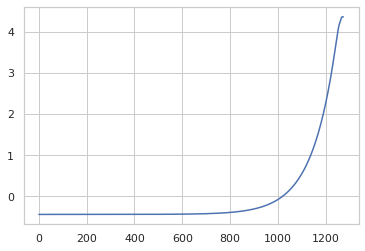

In [30]:
plt.plot(discounted_rewards)

In [21]:
agent._discount_rewards(cum_returns(agent.returns.values[30:, 0]))

array([-99.99628121, -99.99624931, -99.99621709, ...,   0.03135291,
         0.01985515,   0.        ])

In [ ]:
cum_returns()

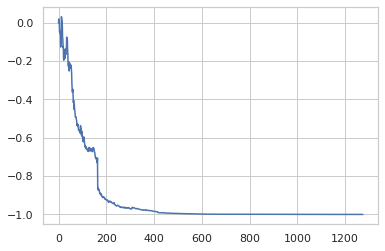

In [20]:
plt.plot(cum_returns(agent.returns.values[30:, 0]))

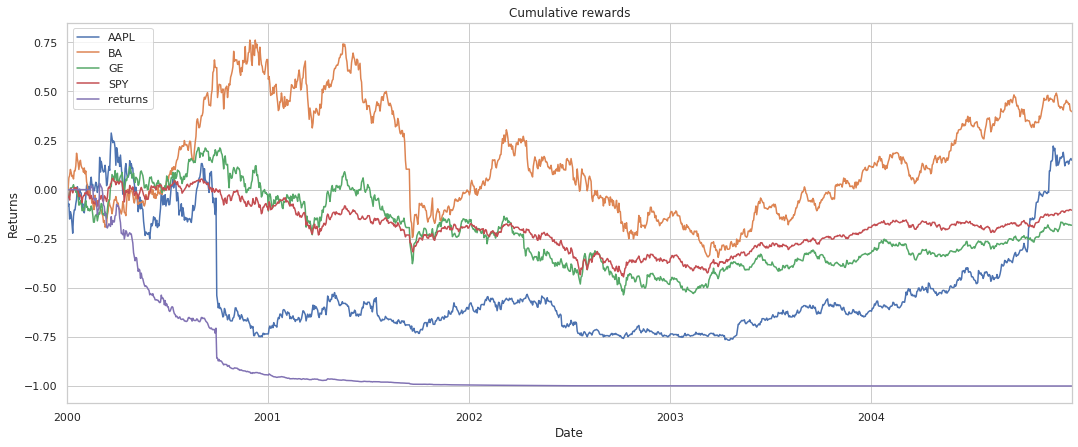

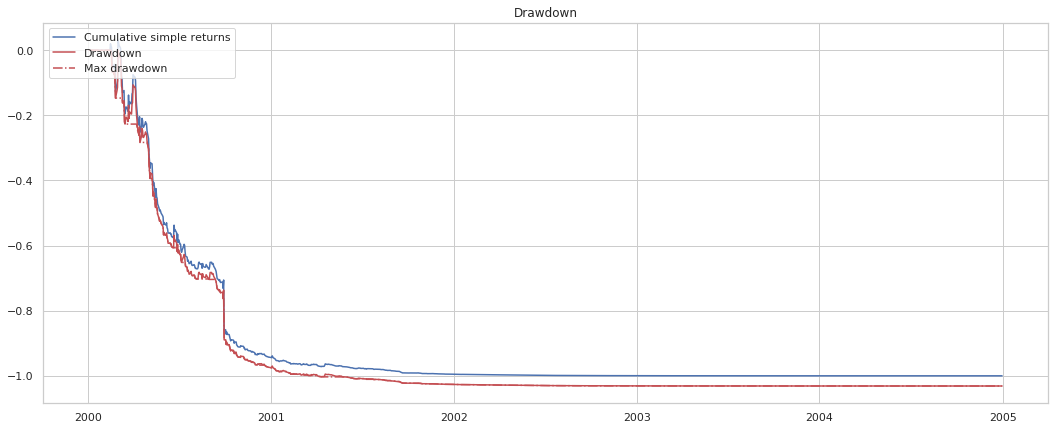

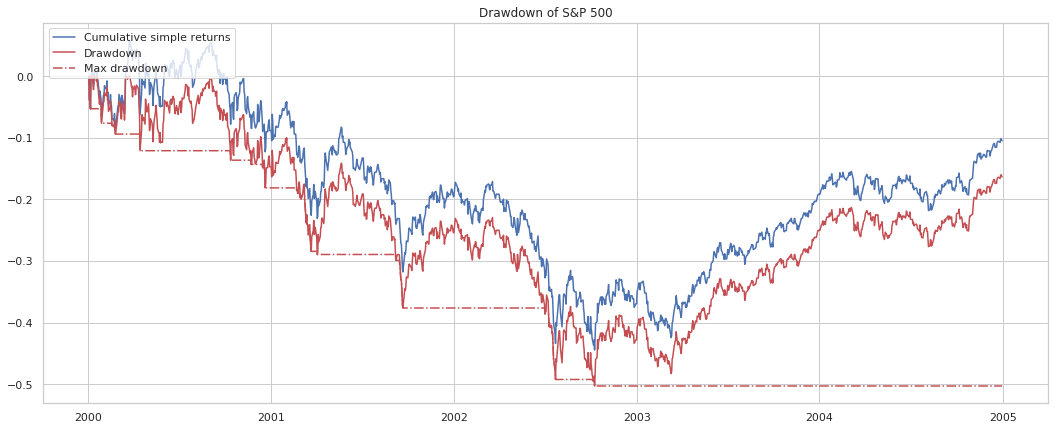

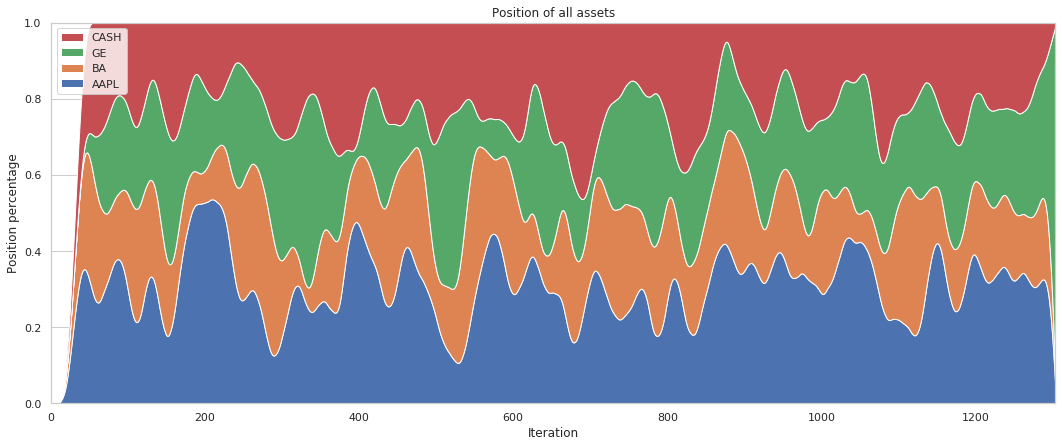

,Sharpe ratio
AAPL,0.816795
BA,0.821133
GE,0.11586
SPY,-0.00844067
returns,-11.2665


In [11]:
def plot_results(episode):
    # Open the log file
    positions, rewards, returns = agent.load_logs(episode)
    
    # Get the baseline stocks
    baseline = Stocks([*stocks.tickers, 'SPY'], start='2000-1-1', end='2004-12-31')
    
    # Plot cumulative rewards
    plot_cumulative_returns(pd.concat([simple_returns(baseline.prices), returns], 1))
    
    # Drawdown plot
    plot_drawdown(returns)
    
    # Drawdown of the S&P index
    plot_drawdown(simple_returns(baseline.prices['SPY']), title='Drawdown of S&P 500')
    
    # Position percentages
    plot_positions(positions)
    
    return show_sharpe_ratio(pd.concat([simple_returns(baseline.prices), returns], 1))
    
plot_results(0)